In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from pandas import DataFrame

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
import sklearn.metrics as metrics

import time
import psutil

In [2]:
np.random.seed(123)

# Define the number of simulations
num_simulations = 100000

# Define the limits for a, b, and c
Cd_limits = (.62, .64)  # Discharge Coefficient for sharp edge orifice (unitless)
dia_limits = (.024, .026) # Orifice Diameter (in)
dP_limits = (950, 1050) # pressure drop (psi)
Sg_limits = (.840, .860) # (specific gravity)

#average
Cd_mean = (Cd_limits[0] + Cd_limits[1]) / 2
dia_mean = (dia_limits[0] + dia_limits[1]) / 2
dP_mean = (dP_limits[0] + dP_limits[1]) / 2
Sg_mean = (Sg_limits[0] + Sg_limits[1]) / 2


# standard deviation 
Cd_stdev = (Cd_limits[1] - Cd_limits[0]) / 6
dia_stdev = (dia_limits[1] - dia_limits[0]) / 6
dP_stdev = (dP_limits[1] - dP_limits[0]) / 6
Sg_stdev = (Sg_limits[1] - Sg_limits[0]) / 6

# Generate random values for a, b, and c
Cd= np.random.normal(loc=Cd_mean, scale=Cd_stdev, size=num_simulations)
dia = np.random.normal(loc=dia_mean, scale=dia_stdev, size=num_simulations)
dP = np.random.normal(loc=dP_mean, scale=dP_stdev, size=num_simulations)
Sg= np.random.normal(loc=Sg_mean, scale=Sg_stdev, size=num_simulations)

# Calculate y for each set of random values
Q = 29.81*Cd*(dia**2)*np.sqrt(dP/Sg)



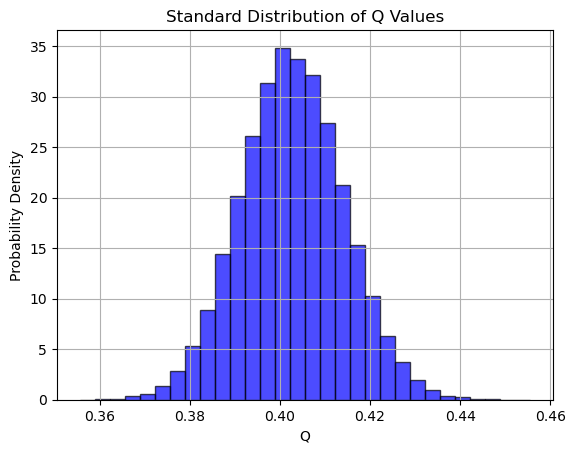

In [3]:
# Plot the standard distribution of Q values
plt.hist(Q, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Standard Distribution of Q Values')
plt.xlabel('Q')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

In [4]:
start_time = time.time()

"""
Split data
"""

np.random.seed(123)

TARGET_A = "Q"


Y = pd.DataFrame({
    'Q': Q
})
X = pd.DataFrame({
    'Cd': Cd,
    'dia': dia,
    'dP': dP,
    'Sg': Sg
})
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)



"""
RANDOM FOREST 
Function
"""


amt_m01_RF = RandomForestRegressor(n_estimators = 7, random_state=1)
amt_m01_RF = amt_m01_RF.fit( X_train, Y_train[TARGET_A] )

Y_Pred_train = amt_m01_RF.predict(X_train)
Y_Pred_test = amt_m01_RF.predict(X_test)



"""
Metrics
"""

RMSE_TEST = np.sqrt(metrics.mean_squared_error(Y_test[TARGET_A], Y_Pred_test))
MAE_TEST = metrics.mean_absolute_error(Y_test[TARGET_A], Y_Pred_test)
R2_TEST = metrics.r2_score(Y_test[TARGET_A], Y_Pred_test)


print("MEAN Test: {:.5f}".format(Y_test[TARGET_A].mean()))
print("RMSE Test: {:.5f}".format(RMSE_TEST))
print("MAE Test: {:.5f}".format(MAE_TEST))
print("R^2 Test: {:.5f}".format(R2_TEST))


end_time = time.time()
execution_time = end_time - start_time
memory_info = psutil.Process().memory_info() # Get memory usage

print(f"Execution Time: {execution_time} seconds")
print(f"Memory Usage: {memory_info.rss / 1024 / 1024} MB")

MEAN Test: 0.40269
RMSE Test: 0.00053
MAE Test: 0.00036
R^2 Test: 0.99790
Execution Time: 1.489030122756958 seconds
Memory Usage: 233.1328125 MB
